$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 4** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Support Vector Machines**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 14/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [SVM, 5 points]

Consider a (hard margin) SVM with the following training points from
two classes:
\begin{eqnarray}
+1: &(2,2), (4,4), (4,0) \nonumber \\
-1: &(0,0), (2,0), (0,2) \nonumber
\end{eqnarray}

Plot these six training points, and construct by inspection the
weight vector for the optimal hyperplane. In your solution, specify
the hyperplane in terms of w and b such that $w_1 x_1 + w_2 x_2 + b =
0$. Calculate what the margin is (i.e., $2\gamma$ where $\gamma$ is the
distance from the hyperplane to its closest data point), showing all
of your work. (Hint: It may be useful to recall that the distance of a point $(a_1,a_2)$ from the line $w_1x_1 + w_2x_2 + b = 0$ is $|w_1a_1 + w_2a_2 + b|/\sqrt{w_1^2 + w_2^2}$.)

## [SVM cont'd, 5 points]


Consider the same problem from above.

a. Write the primal formulation of the SVM **for this specific example** i.e. you have to specialise the general formulation for the set of inputs given.

b. Give the optimal primal solution **for this specific**.

c. Write the dual formulation **for this specific**.

d. Give the optimal dual solution, comment on support vectors.


# Solutions Theoretical Problems 
## SVM 1
We wish to calculate the optimal hyperplane, i.e. the optimal decision boundary line that separates the two classes. The fact that it becomes a line is that the hyperplane of a 2D-space is a 1D line. If we plot the data (see plot below), we can see that we have 4 support vectors. 

$(2,0)^T , (0,2)^T : -1 $

$(2,2)^T, (4,0)^T : 1$

We know that the weight vector is perpendicular to the decision boundry and has the form $W = w_1x_1 + w_2x_2 + b = 0$
In order to calculate this we put in the values for the support vectors such that:
$2w_1 + 0w_2x_2 + b = -1$
$0x_1 + 2x_2 + b = -1$
$2x_1 + 2x_2 + b = 1$
$4x_1 + 4x_2 + b = 1$

Taking these and solving them gives us the parameters 

$w_1 = 1 ; w_2 = 1 ; b = 3$. To calculate that our hyperplane correctly classifies the given data we know that sign(W^T X + b) $\leq$ -1 for points in class -1 and sign(W^T X + b) $\geq$ 1 in points with class 1. Inserting the point $(0,0)$ yields the result $-3$ and inserting $(4,4)$ yields $5$, thus the decision boundary correctly classifies the points. To calculate the margin $2\lambda$ and we have that we have that $\lambda = \frac{1}{||W||} = \frac{1}{\sqrt{w_1^2 + w_2^2}}$. And thus have the margin $2*\frac{1}{\sqrt{w_1^2 + w_2^2}} = \frac{2}{\sqrt{2}}$



## SVM 2
### a)

For the primal the general formulation is the same with additional constraint as the data:

$\underset{w}{argmin} \frac{1}{2}w^Tw$

$s.t.: $

$1*(w^T(2,2) + b) \geq 1$

$1*(w^T(4,0) + b) \geq 1$

$-1*(w^T(2,0) + b) \geq 1$

$-1*(w^T(0,2) + b) \geq 1$

This is an optimization problem that can be solved using lagrange multipliers. Extending whith these yields the new optimization problem; $\underset{wn\alpha}{{argmin}} \frac{||w^T||}{2} - \sum_{n=1}^N\alpha_n(t_n(w^Tx_n+b)-1)$
### b)
To find the min argument here we derivate the expression with regards to w and b and get $w=\sum_{n=1}^N\alpha_nt_nx_n$. and $\frac{d}{db} = \sum_{n=1}^N\alpha_nt_n$, we are looking for the minimum argument, i.e. when the derivative is equal to 0, if we insert our support vectors $x_i$ in this equation we get the optimal primal of $\begin{align}
    w &= \begin{bmatrix}
           2\alpha_1+4\alpha_2-3\alpha_3 \\
           2\alpha_2-2\alpha_4
         \end{bmatrix}
  \end{align}$
  Where we also know that $\alpha_1+\alpha_2-\alpha_3-\alpha_4 = 0$ and $\alpha_n \geq 0$
  
### c)
Inserting back these derivatives into the initial problem yields the expression: 
$\underset{w,\alpha}{argmax}  \sum_{n=1}^N\alpha_n - \frac{1}{2}\sum_{n,m=1}^N\alpha_m\alpha_nt_mt_nx_m^Tx_n$ where we know that $\sum_{n=1}^N\alpha_n = 0$ i.e. $\alpha_1+\alpha_2-\alpha_3-\alpha_4 = 0$ and also that $\alpha_n \geq 0$. This expression we need to maximize in order to find the optimal dual

### d) 
In our example we have four support vectors, they each have a lagrange term and a label as mentioned below. 
$[(2,2)^T,t_n = 1,\alpha_1],[(4,0)^T,t_n=1,\alpha_2],[(2,0)^T,t_n=-1,\alpha_3],[(0,2)^T,t_n=-1,\alpha_4]$ Iserting this into the equation yields 

$\underset{w,\alpha}{argmax} (\alpha_1 + \alpha_2 + \alpha_3 + \alpha_4) - (4\alpha_1\alpha_1+8\alpha_1\alpha_2-4\alpha_1\alpha_3-8\alpha_2\alpha_3-4\alpha_1\alpha_4)$ where $\sum_{n=1}^N\alpha_n = 0$ i.e. $\alpha_1+\alpha_2-\alpha_3-\alpha_4 = 0$ and $\alpha_n \geq 0$

# Practical problems

All data files can be loaded using the following code for example:
```python
import numpy as np
data = np.loadtxt('d1.txt')
X = data[:,:2]
Y = data[:,-1]
```

For this assigment, you may use sklearn.svm.SVC or sklearn.svm.NuSVC. 

## [SVM, 5 points]

Consider the dataset **d1.txt** having two-dimensional points $X$ and corresponding labels $Y$.

a. Train an SVM (with linear kernel) on the above data.

b. Plot the data and the separating hyperplane of the trained classifier. Color the points of one class red and the other blue. Mark points that could not be separated correctly. Also, mark the support vectors.

c. Does the classifier have bias, and if so, what is it?

d. What is the (soft) margin?

## [Kernels, 5 points]

Download the dataset **d2.txt**. Consider the following kernels.

* Linear kernel
* Quadratic kernel 
* Radial Basis Function (RBF) kernel

a. Train an SVM with the linear kernel on all of the data (d2.txt). Plot the data. Color the points of one class red and the other blue. Mark points that could not be separated correctly by the trained model.

b. Plot the decision surfaces for the Quadratic and RBF kernel seperately.

# Practical problems 
## SVM
a - b ) The SVM below is trained on the input data and plotted in red and green corresponding to the classes. The hard line in the middle is the hyperplane and the dotted lines are the soft margins for C = 1 and C = -1. The support vectors are coloured Green and the wrongfully separated points are colored yellow. 

c) The model do have bias as the line equation is $w^Tx + b$ where b(the bias term) is the intersection with the y-axis. As the intersection is at 3 we do have bias = 3.

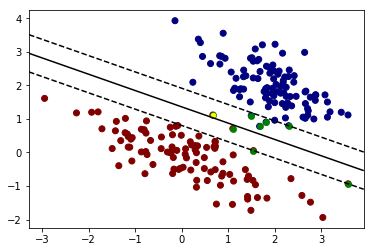

<bound method ClassifierMixin.score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>


In [222]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt


data = np.loadtxt('d1.txt')
X = data[:,:2]
Y = data[:,-1]
# Fit model using the given training data
graph = SVC(kernel='linear');
graph.fit(X, Y);

# Create scatter plot for data where label array is the given colormap. 
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.jet);

# Create array of "Wrong predictions"

temp = [];
predictions = graph.predict(X)
for input, prediction, label in zip(X,predictions,Y):
    if prediction != label: 
        temp.append(input)
        
errors = np.array(temp)





ax = plt.gca() # Get the polar axis in the graph 
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Make meshgridgrid
x1 = np.linspace(xlim[0], xlim[1], 300)
y1 = np.linspace(ylim[0], ylim[1], 300)
YY, XX = np.meshgrid(y1, x1)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = graph.decision_function(xy).reshape(XX.shape)
# Plot the hyperplane and margins
ax.contour(XX, YY, Z, colors='black', levels=[-1,0,1], linestyles=['--','-','--'] );



# Plot the support vectors in pink
ax.scatter(graph.support_vectors_[:, 0], graph.support_vectors_[:, 1], s=40,
           linewidth=0.5, facecolors='green');

plt.scatter(errors[:,0].T,errors[:,1].T,c='yellow', s=20);

plt.show();

print(graph.score)